#           Assignment prepared by Afnan : Predicting a patient with a stroke in different measures 

In [34]:

#step1: importing lib.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB


## Experiment 1 : Apply all classification model on the dataset 

## DTs

In [36]:
# reading the dataset
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
#The goal of this database is to predict a patient is likely to get stroke based on the information about the patient
#look at top 5 rows in data set
print(df.head())
#get the info and see if there are nan values
print(df.info())



      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

In [37]:
# convert text to category
df['gender']=df['gender'].astype('category').cat.codes
df["ever_married"]=df["ever_married"].astype('category').cat.codes
df["work_type"]=df["work_type"].astype('category').cat.codes
df["Residence_type"]=df["Residence_type"].astype('category').cat.codes
df["smoking_status"]=df["smoking_status"].astype('category').cat.codes

In [38]:
# drop NaN value
df=df.dropna()

print(df.head())


print(df.info())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   
5  56669       1  81.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  
5               1             186.21  29.0               1       1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns)

In [39]:
# Deleting the unimportant feature during the prediction process
df=df.drop(["id"],axis=1)
# get x values which is all colms except the stork col.
x= df.drop(["stroke"],axis=1)

# get y
y = df.iloc[:,10].values

# Splitting the data into two (training and test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [40]:

#  create DT model
clf = DecisionTreeClassifier(criterion="entropy")  # max_depth

# Fit a Decision Tree model
clf.fit(X_train, y_train)
# predict for test
y_pred = clf.predict(X_test)


print(accuracy_score(y_test, y_pred))


0.9114052953156823


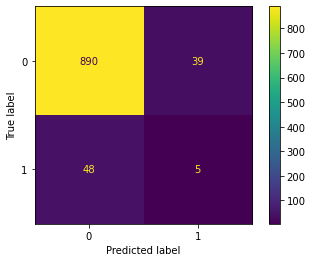

In [41]:

 cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test) )
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))

 disp.plot()
 plt.show()


In [42]:

# print precision    recall  f1-score accuracy
print("=============test report================")
test_report=classification_report(y_test,y_pred)
print(test_report)
print("=============train report===============")
y_pred = clf.predict(X_train)
test_report=classification_report(y_train,y_pred)
print(test_report)


=============test report================
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       929
           1       0.11      0.09      0.10        53

    accuracy                           0.91       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.90      0.91      0.91       982

=============train report===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00       156

    accuracy                           1.00      3927
   macro avg       1.00      1.00      1.00      3927
weighted avg       1.00      1.00      1.00      3927



## Random forest

In [45]:

# create Rnadom forest 
clf = RandomForestClassifier(n_estimators=8, random_state=0) #n_estimators int, default=100 The number of trees in the fore st.


In [46]:
# fit
clf.fit(X_train, y_train)
# predict test split
y_pred = clf.predict(X_test)


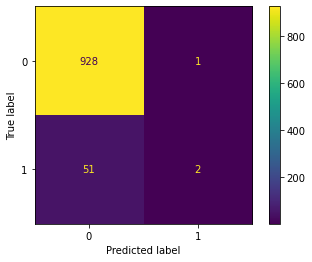

In [47]:
 cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test) )
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))

 disp.plot()
 plt.show()


In [48]:
# print precision    recall  f1-score accuracy
print("=============test report================")
test_report=classification_report(y_test,y_pred)
print(test_report)
print("=============train report===============")
y_pred = clf.predict(X_train)
test_report=classification_report(y_train,y_pred)
print(test_report)



=============test report================
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.67      0.04      0.07        53

    accuracy                           0.95       982
   macro avg       0.81      0.52      0.52       982
weighted avg       0.93      0.95      0.92       982

=============train report===============
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3771
           1       1.00      0.72      0.84       156

    accuracy                           0.99      3927
   macro avg       0.99      0.86      0.92      3927
weighted avg       0.99      0.99      0.99      3927



## perceptron

In [50]:
# crete Perceptron
clf = Perceptron()

# fit the data
clf.fit(X_train, y_train)
#predict
y_pred = clf.predict(X_test)



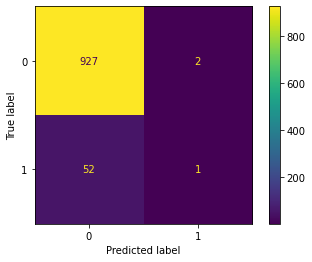

In [51]:
 cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test) )
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))

 disp.plot()
 plt.show()


In [52]:
#  print precision    recall  f1-score accuracy
print("=============test report================")
test_report=classification_report(y_test,y_pred)
print(test_report)
print("=============train report===============")
y_pred = clf.predict(X_train)
test_report=classification_report(y_train,y_pred)
print(test_report)


=============test report================
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.33      0.02      0.04        53

    accuracy                           0.95       982
   macro avg       0.64      0.51      0.50       982
weighted avg       0.91      0.95      0.92       982

=============train report===============
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3771
           1       0.12      0.01      0.02       156

    accuracy                           0.96      3927
   macro avg       0.54      0.50      0.50      3927
weighted avg       0.93      0.96      0.94      3927



## NB

In [54]:
# NB
model = GaussianNB()

# fit 
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)



0.8767820773930753

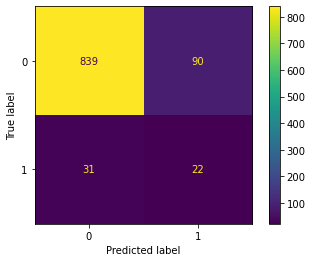

In [55]:
 cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test) )
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test))

 disp.plot()
 plt.show()


In [56]:
 # print precision    recall  f1-score accuracy
print("=============test report================")
test_report=classification_report(y_test,y_pred)
print(test_report)
print("=============train report===============")
y_pred = model.predict(X_train)
test_report=classification_report(y_train,y_pred)
print(test_report)



=============test report================
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       929
           1       0.20      0.42      0.27        53

    accuracy                           0.88       982
   macro avg       0.58      0.66      0.60       982
weighted avg       0.92      0.88      0.90       982

=============train report===============
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3771
           1       0.13      0.41      0.20       156

    accuracy                           0.87      3927
   macro avg       0.55      0.65      0.57      3927
weighted avg       0.94      0.87      0.90      3927

